In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("/home/yullhan/Projects/NIH-ChestXRay/data/raw/Data_Entry_2017.csv")

In [11]:
data["Finding Labels"].str.split("|").apply(len).value_counts()

Finding Labels
1    91324
2    14306
3     4856
4     1247
5      301
6       67
7       16
9        2
8        1
Name: count, dtype: int64

In [3]:
from pathlib import Path
len(list(Path('../data/raw/chest_xray').rglob('*.jpeg')))

5856

['person1660_bacteria_4404', 'person1429_bacteria_3688', 'NORMAL2-IM-0866-0001', 'person37_virus_82', 'person522_bacteria_2210', 'person1_virus_9', 'person1306_bacteria_3276', 'person758_bacteria_2662', 'NORMAL2-IM-0095-0001', 'person628_bacteria_2505']


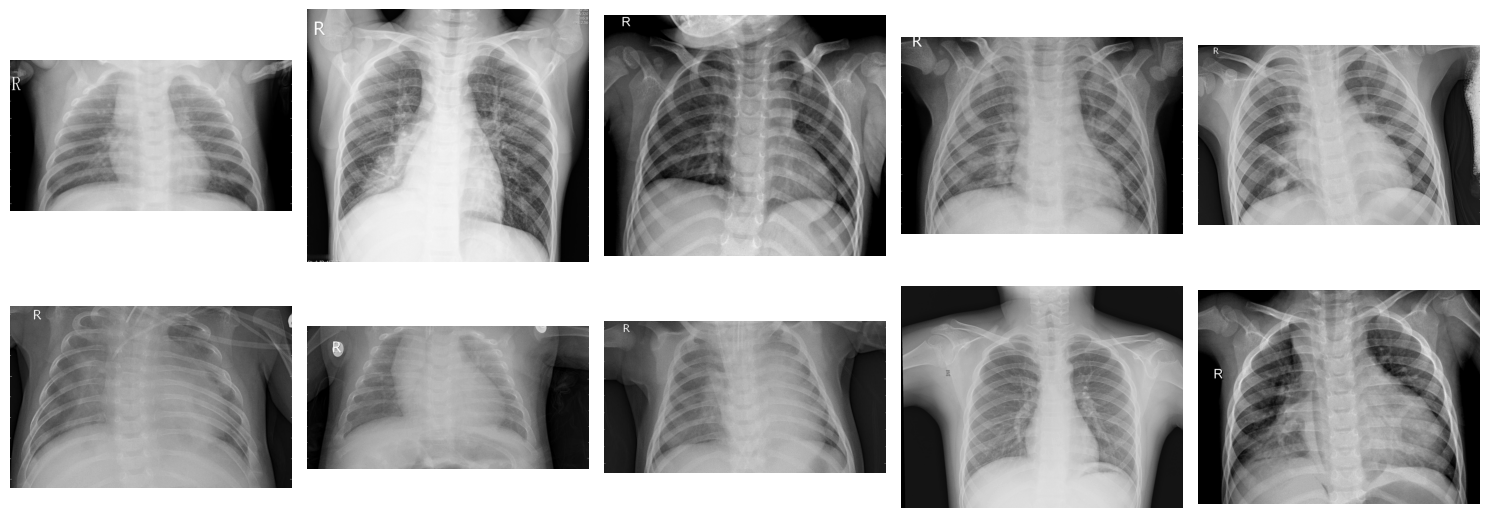

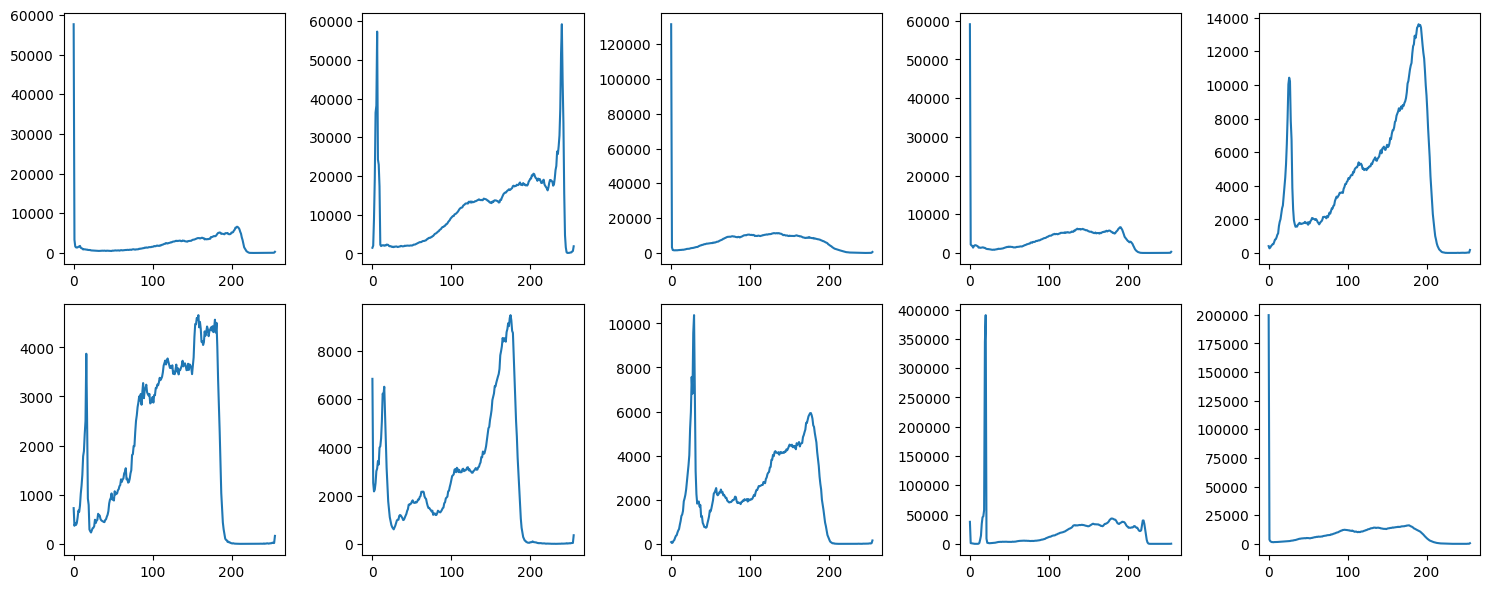

In [6]:
import cv2
import json
import random
import numpy as np
import pandas as pd

from pathlib import Path

from xrkit.base import CONFIG
from xrkit.enhancement import calculate_enhancement_metrics
from xrkit.enhancement.filters import (
    histogram_equalization,
    contrast_limited_adaptative_histogram_equalization,
    bilateral_filter,
    local_histogram_equalization,
    low_light_image_enhancement,
    dual_illumination_estimation,
    total_variance_denoising,
)

import matplotlib.pyplot as plt
def show_images(images):
    _, axes = plt.subplots(2, 5, figsize=(15, 6))

    for index, axis in enumerate(axes.flat):
        axis.imshow(images[index], cmap="gray")
        axis.axis("off")

    plt.tight_layout()
    plt.show()

    _, axes = plt.subplots(2, 5, figsize=(15, 6))

    for index, axis in enumerate(axes.flat):
        histogram = cv2.calcHist([images[index]], [0], None, [256], [0, 256])

        axis.plot(histogram)

    plt.tight_layout()
    plt.show()
random.seed(34)
path = Path("../data/raw/chest_xray")
image_paths = random.sample([ip for ip in path.rglob("*.jpeg")], 10)
print([imagepath.stem for imagepath in image_paths])

images = [cv2.imread(path.as_posix(), cv2.IMREAD_GRAYSCALE) for path in image_paths]

show_images(images)